# `dicom` to `array` tutorial

In [14]:
import os
import numpy as np
import pydicom # !pip install pydicom


def load_dicom_images_as_numpy(folder_path: str):
    """
    Load DICOM images from a folder, preprocess them, and convert to a numpy array.

    Args:
    folder_path (str): Path to the folder containing DICOM files.

    Returns:
    numpy.ndarray: An array containing all the preprocessed DICOM images.
    """

    images = []
    ids = []

    # Iterate over the DICOM files
    for filename in os.listdir(folder_path):
        if filename.lower().endswith('.dcm'):
            id = filename.split('_')[-3]
            ids.append(id)
            filepath = os.path.join(folder_path, filename)
            dicom_data = pydicom.dcmread(filepath)
            image = dicom_data.pixel_array
            #image = image[100:320, 100:300] # cropping
            images.append(image)

    # Sorting images with respect to their ids
    sorted_pairs = sorted(zip(ids, images), key=lambda x: x[0])
    sorted_ids, sorted_images = zip(*sorted_pairs)

    # Stack all the images into a single numpy array
    numpy_images = np.stack(sorted_images)

    return numpy_images

In [15]:
def normalize(dicom_array):
    max_val = np.max(dicom_array)
    min_val = np.min(dicom_array)
    return (dicom_array - min_val) / (max_val - min_val)

In [23]:
# .dcm 파일들이 저장되어있는 디렉토리의 경로를 str 타입 변수로 정의
dicom_directory = 'data/38'

# load_dicom_images_as_numpy는 dir 내의 dcm 파일을 순회하며 (num_of_dcms, height, width) 쉐입의 array로 저장합니다.
dicom_array = load_dicom_images_as_numpy(dicom_directory)
dicom_array.shape

(96, 160, 160)

In [24]:
normalized_dicom_array = normalize(dicom_array)

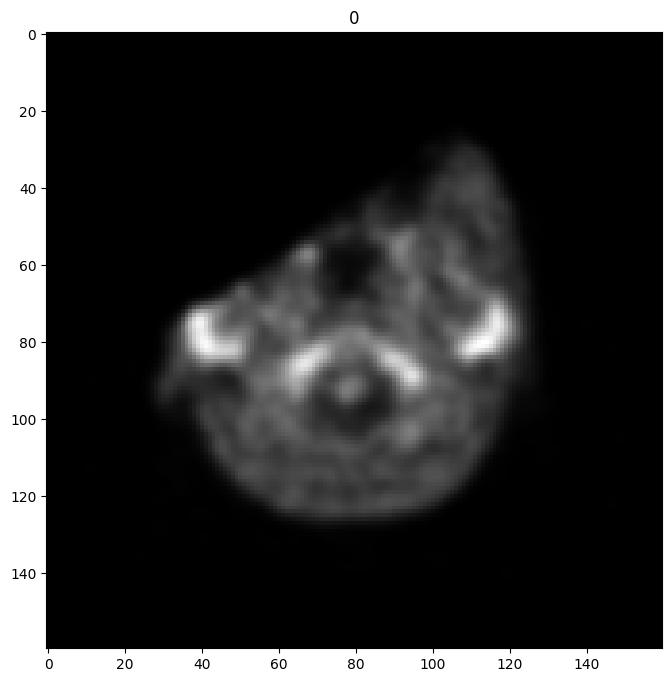

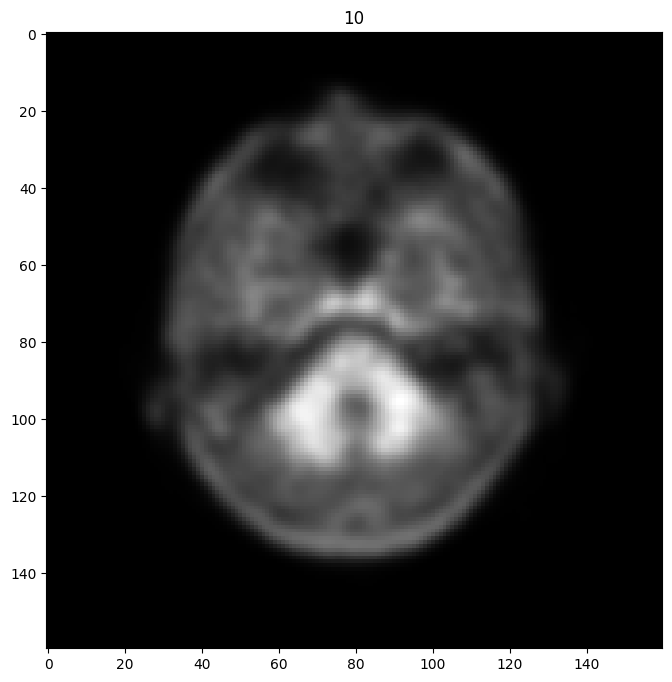

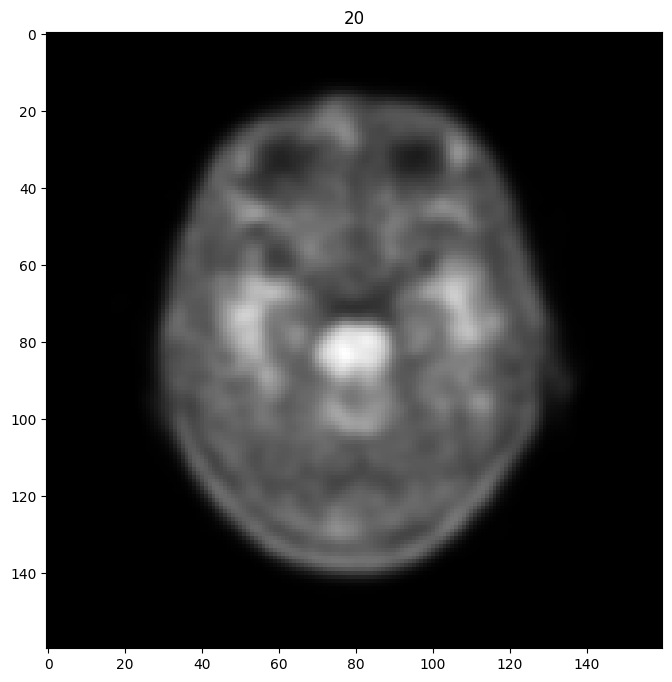

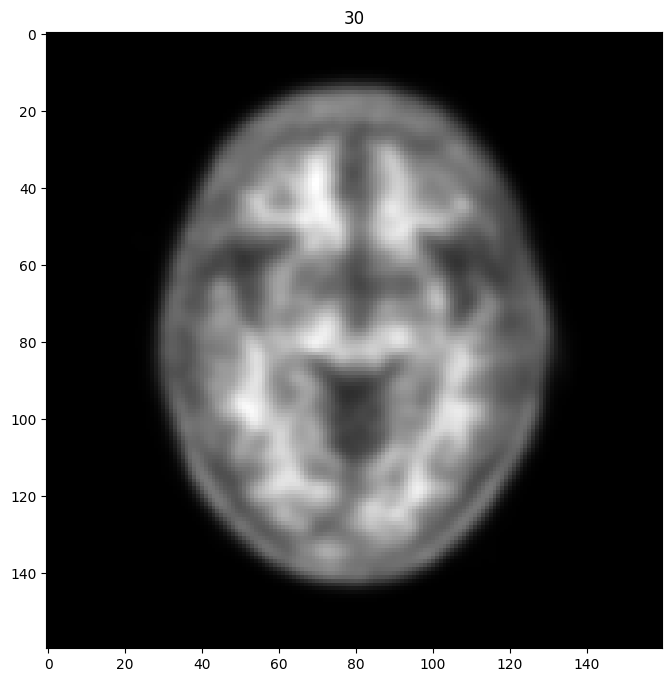

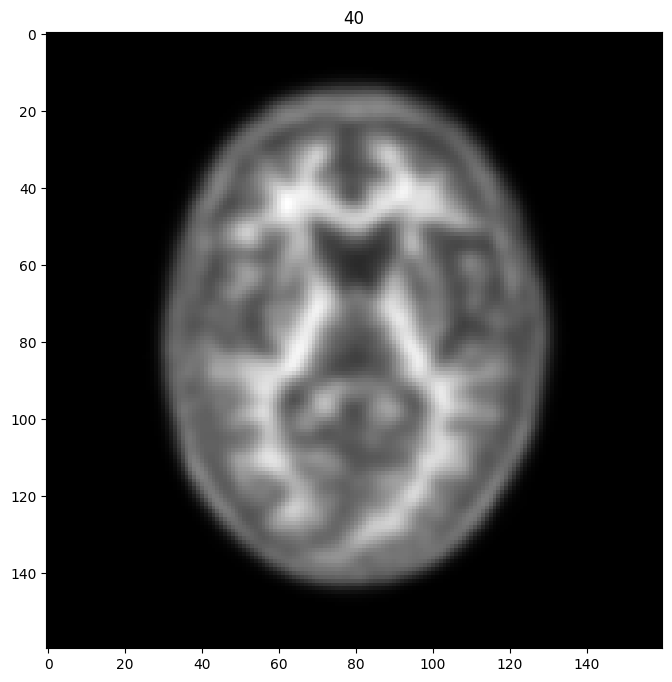

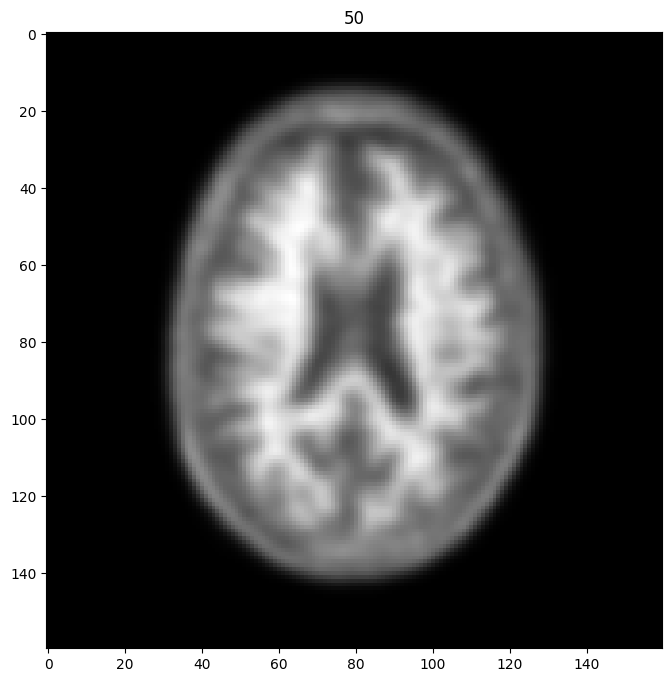

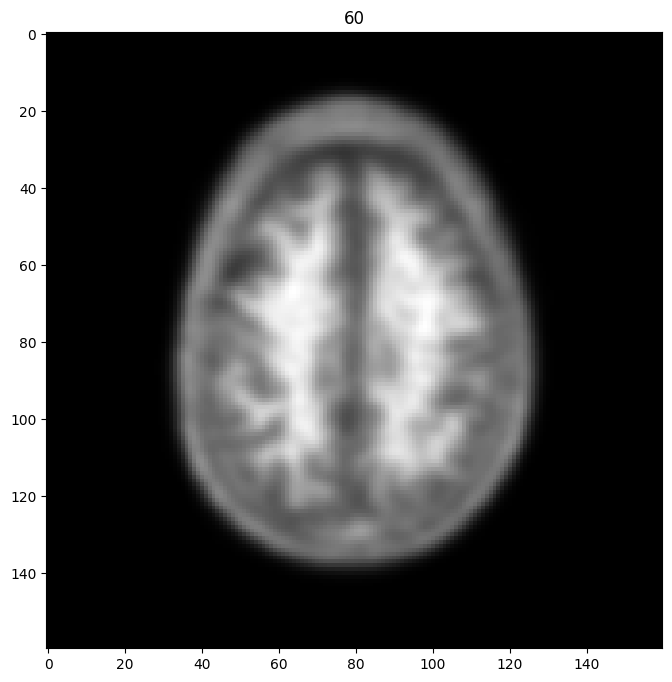

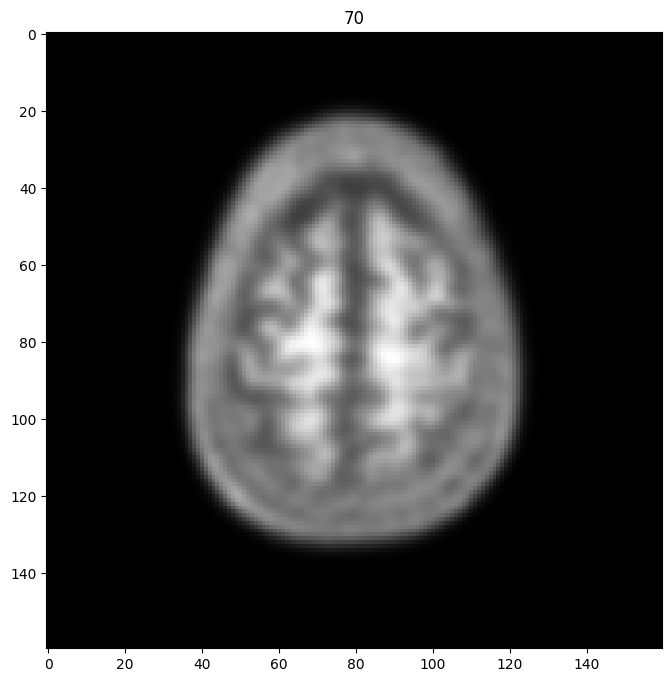

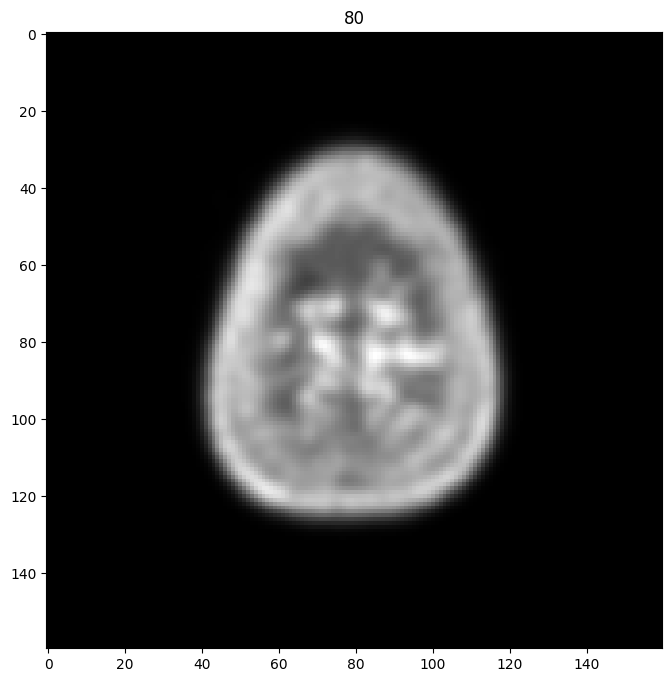

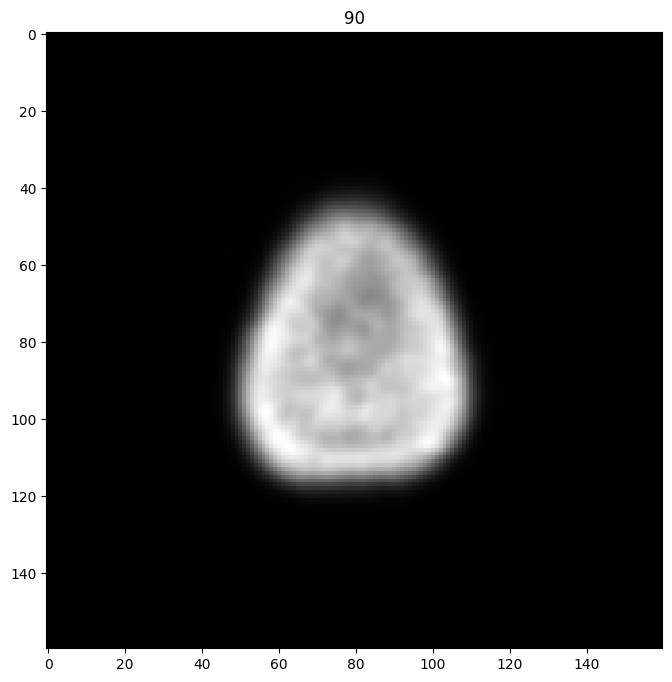

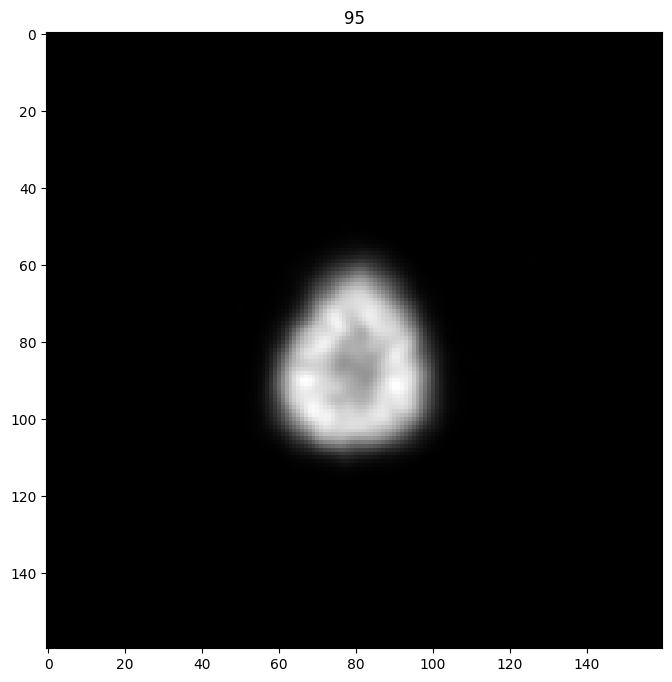

In [27]:
import matplotlib.pyplot as plt

steps = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95]

for step in steps:
    plt.figure(figsize=(8,8))
    plt.imshow(normalized_dicom_array[step], cmap='gray')
    plt.title(f'{step}')

In [6]:
import imageio # pip install imageio

def create_dicom_gif(dicom_array, filename, duration=0.1):
    frames = []
    for i in range(len(dicom_array)):
        # 이미지를 흑백으로 변환하여 프레임에 추가
        frame = (dicom_array[i] * 255)
        frames.append(frame)

    # 프레임들을 GIF로 변환
    imageio.mimsave(filename, frames, 'GIF', duration=duration)

create_dicom_gif(normalized_dicom_array, filename='test.gif', duration=5.0)

# Transform Total Dataset

In [11]:
import os
import pandas as pd

meta = pd.read_csv('processed_meta.csv')

In [13]:
idx = meta['index']
data_dir = 'data'
np_data_dir = 'np_data'

for id in idx:
    print(id)
    path = os.path.join(data_dir, str(id))
    voxel_image = normalize(load_dicom_images_as_numpy(path))
    np.save(os.path.join(np_data_dir, str(id) + '.npy'), voxel_image)
    

0
1
2
4
5
7
8
9
10
11
12
13
14
15
17
19
20
21
22
23
25
27
30
31
33
34
35
36
37
38


/var/folders/f_/8q99w4md3hb8qbyr7lt7v7r00000gn/T/ipykernel_82703/605794767.py:4: RuntimeWarning: overflow encountered in scalar subtract
  return (dicom_array - min_val) / (max_val - min_val)


39
40
41
42
43
44
45
46
47
49
50
52
54
55
56
58
59
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
85
87
89
90
92
93
94
95
96
97
98
99
100
102
103
104
106
107
109
110
111
113
114
115
117
118
119
120
121
122
124
126
128
129
130
132
134
135
137
140
142
144
148
152
153
154
155
156
157
158
159
160
162
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
184
186
188
189
190
192
194
